In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
car_sales_data = pd.read_csv(r"Used Car dataset\used_car_dataset.csv")
car_sales_data.head()

,Unnamed: 0,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,"6,000 km",2021.0,6525000.0,1490cc,Automatic
1,1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,"68,000 km",2012.0,1625000.0,1000cc,Manual
2,2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,"150,000 km",2015.0,2550000.0,1300cc,Automatic
3,3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,"18,000 km",2022.0,9000000.0,3500cc,Automatic
4,4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,"110,000 km",2015.0,3350000.0,1300cc,Automatic


In [18]:
car_sales_data = car_sales_data.drop(['currency','Unnamed: 0','item_condition','manufacturer'],axis=1)
car_sales_data.dropna()
car_sales_data = car_sales_data.iloc[:30000,:]
car_sales_data.head()

,brand,description,fuel_type,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,MG,MG HS 2021 for sale in Lahore,Petrol,"6,000 km",2021.0,6525000.0,1490cc,Automatic
1,Toyota,Toyota Aygo 2012 for sale in Islamabad,Petrol,"68,000 km",2012.0,1625000.0,1000cc,Manual
2,Honda,Honda City 2015 for sale in Lahore,Petrol,"150,000 km",2015.0,2550000.0,1300cc,Automatic
3,KIA,KIA Sorento 2022 for sale in Sialkot,Petrol,"18,000 km",2022.0,9000000.0,3500cc,Automatic
4,Toyota,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,"110,000 km",2015.0,3350000.0,1300cc,Automatic


In [19]:
#Replacting Sting to numerics
brand_list = car_sales_data['brand'].unique()
brand_dict = {brand_list[i]:i for i in range(len(brand_list))}
car_sales_data['brand']=car_sales_data['brand'].replace(brand_dict)

description_list = car_sales_data['description'].unique()
description_dict = {description_list[i]:i for i in range(len(description_list))}
car_sales_data['description'] = car_sales_data['description'].replace(description_dict)

fuel_type_list = car_sales_data['fuel_type'].unique()
fuel_type_dict = {fuel_type_list[i]:i for i in range(len(fuel_type_list))}
car_sales_data['fuel_type'] = car_sales_data['fuel_type'].replace(fuel_type_dict)

car_sales_data['vehicle_transmission'] = car_sales_data['vehicle_transmission'].replace({'Automatic':0,'Manual':1})



In [20]:
car_sales_data['mileage_from_odometer'] = car_sales_data['mileage_from_odometer'].map(lambda x: str(x)[:-3])
car_sales_data['mileage_from_odometer'] = car_sales_data['mileage_from_odometer'].astype(str)
car_sales_data['mileage_from_odometer']=car_sales_data['mileage_from_odometer'].str.replace(',','')
car_sales_data['mileage_from_odometer'] = car_sales_data['mileage_from_odometer'].astype(int)

car_sales_data['vehicle_engine'] = car_sales_data['vehicle_engine'].map(lambda x: str(x)[:-2])
car_sales_data['vehicle_engine'] = car_sales_data['vehicle_engine'].astype(str)
car_sales_data['vehicle_engine'] = pd.to_numeric(car_sales_data['vehicle_engine'],errors='ignore')

car_sales_data['model_date'] = car_sales_data['model_date'].astype(int)

In [21]:
car_sales_data.head(10)
car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  30000 non-null  int64  
 1   description            30000 non-null  int64  
 2   fuel_type              30000 non-null  int64  
 3   mileage_from_odometer  30000 non-null  int32  
 4   model_date             30000 non-null  int32  
 5   price                  30000 non-null  float64
 6   vehicle_engine         29956 non-null  float64
 7   vehicle_transmission   30000 non-null  int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 1.6 MB


In [22]:
#spiitting model
car_sales_data = car_sales_data.dropna()
X = car_sales_data.drop('price',axis=1)
Y = car_sales_data['price']
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,random_state=50,test_size=1/4)
xTrain

,brand,description,fuel_type,mileage_from_odometer,model_date,vehicle_engine,vehicle_transmission
25315,1,2183,0,21000,2021,1600.0,0
16541,2,2212,1,68000,2015,1500.0,0
25335,5,1004,0,212000,2006,660.0,0
23163,2,3872,0,150000,1998,1500.0,0
28362,3,479,0,5000,2021,2000.0,0
...,...,...,...,...,...,...,...
15682,8,5283,0,10000,2008,800.0,0
22676,2,8430,0,52000,2016,1500.0,0
10140,2,1446,0,98000,2015,1500.0,0
5612,5,1794,0,41000,2019,1300.0,0


In [23]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [24]:
linear_model.fit(xTrain,yTrain)

LinearRegression()

In [34]:
print('Linear Model Traning Score:',linear_model.score(xTrain,yTrain))
print('Linear Model Test Score:',linear_model.score(xTest,yTest))

Linear Model Traning Score: 0.43429722009456584
Linear Model Test Score: 0.45424108964857257


<AxesSubplot:xlabel='brand'>

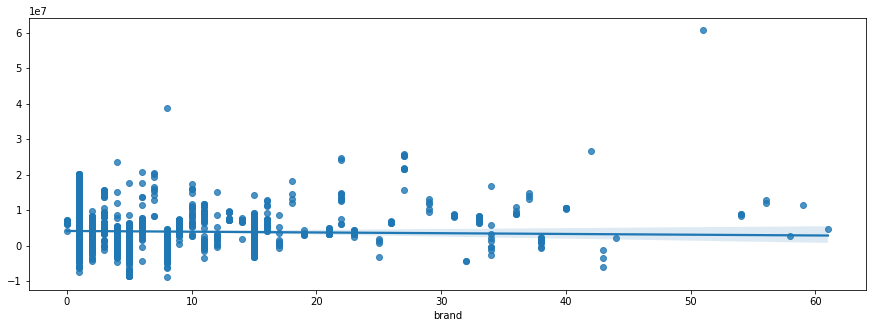

In [66]:
# polotting datas
#Linearregression
fig,axs = plt.subplots(figsize=(15,5))
sns.regplot(data=car_sales_data,x=xTest.iloc[:,0],y=linear_model.predict(xTest))

In [26]:
#using Decission Tree 
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=0)

In [27]:
tree_model.fit(xTrain,yTrain)

DecisionTreeRegressor(random_state=0)

In [39]:
print('DecisionTreeRegressor Model Traning Score:',tree_model.score(xTrain,yTrain)*100)
print('DecisionTreeRegressor Model Test Score:',tree_model.score(xTest,yTest)*100)

DecisionTreeRegressor Model Traning Score: 99.98794396312027
DecisionTreeRegressor Model Test Score: 89.40432352316057


<AxesSubplot:xlabel='brand'>

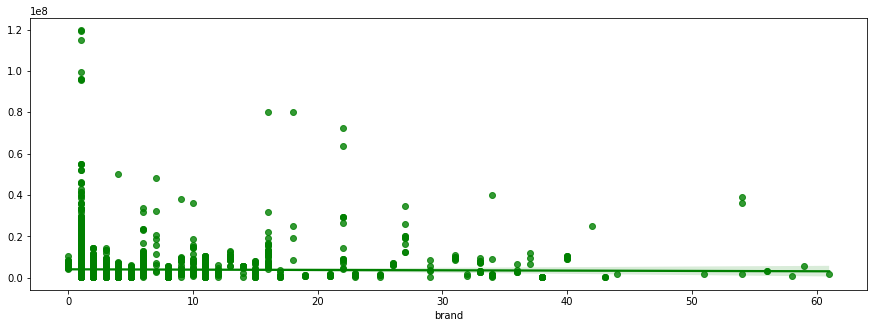

In [68]:
#decission tree regressor
fig,axs = plt.subplots(figsize=(15,5))
tree_y_predict = tree_model.predict(xTest)
sns.regplot(data=car_sales_data,x=xTest.iloc[:,0],y=tree_y_predict,color='g')

In [29]:
# using random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=300,random_state=0)

In [30]:
forest.fit(xTrain,yTrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [54]:
print('RandomForestRegressor Model Traning Score:',forest.score(xTrain,yTrain)*100)
print('RandomForestRegressor Model Test Score:',forest.score(xTest,yTest)*100)

RandomForestRegressor Model Traning Score: 98.34599397863396
RandomForestRegressor Model Test Score: 94.94743130788548


<AxesSubplot:xlabel='brand'>

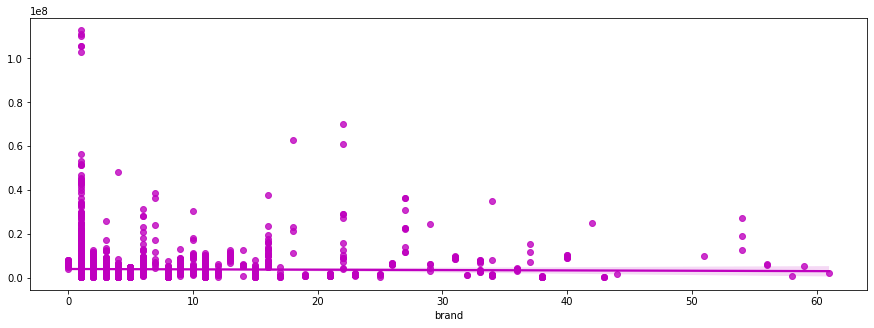

In [64]:
#random forest regressor
fig,axs = plt.subplots(figsize=(15,5))
forest_y_predict = forest.predict(xTest)
sns.regplot(data=car_sales_data,x=xTest.iloc[:,0],y=forest_y_predict,color='m')

In [32]:
linear_y_predict = linear_model.predict(xTest)
tree_y_predict = tree_model.predict(xTest)
forest_y_predict = forest.predict(xTest)

<AxesSubplot:xlabel='price', ylabel='Density'>

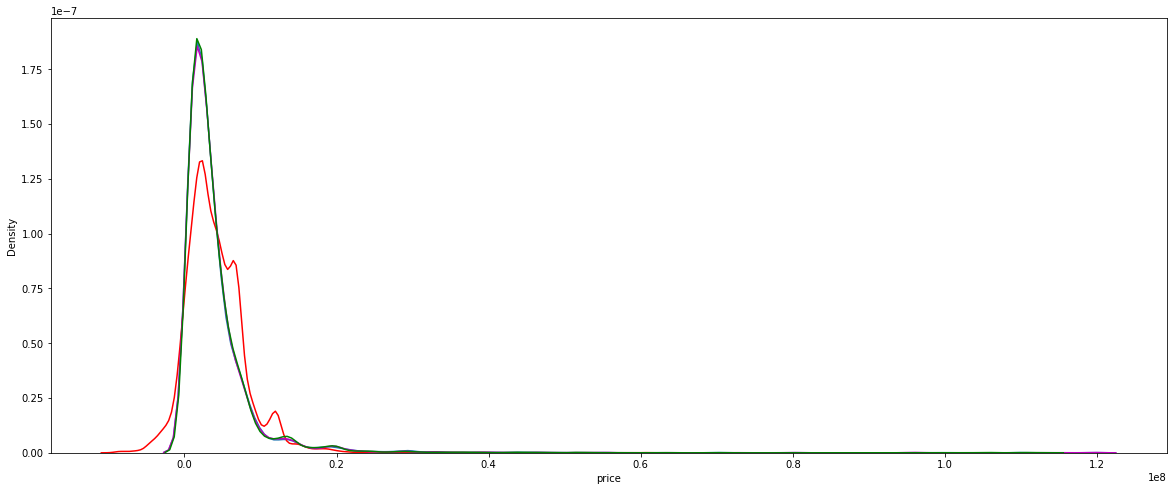

In [73]:
import warnings
warnings.filterwarnings('ignore')
fig,axs = plt.subplots(figsize=(20,8))
sns.distplot(yTest,hist=False)
sns.distplot(linear_y_predict,hist=False,color='r',)
sns.distplot(tree_y_predict,hist=False,color='m',)
sns.distplot(forest_y_predict,hist=False,color='g')

By using Linear regression,Decission tree regression and Randomforest Regression. Linear model is failed due to 
under fitting where Decission tree and RandomForest have good outcome with accuracy more than 90%. Random forest have
98% traning accuracy and 94% test data accuracy compared to Decission tree 